In [1]:
import pandas as pd

# Ruta del CSV
csv_path = "model_evaluations.csv"

# Cargar el CSV y limpiar columnas
df = pd.read_csv(csv_path)

# Eliminar espacios en nombres de columnas y convertir a tipos correctos si es necesario
df.columns = df.columns.str.strip()
df["Modelo"] = df["Modelo"].str.strip()

# Convertir métricas numéricas a float (por si acaso)
metricas = ["Test RMSE", "Test MAE", "Test R2", "Precision@10", "Recall@10", "F1@10", "NDCG@10"]
df[metricas] = df[metricas].astype(float)

# Mostrar el DataFrame
print(f"DataFrame cargado desde {csv_path}:")
display(df)  # Usar display() si estás en Jupyter

DataFrame cargado desde model_evaluations.csv:


,Modelo,Test RMSE,Test MAE,Test R2,Precision@10,Recall@10,F1@10,NDCG@10
0,R (100K),0.9439,0.7408,0.1845,0.4943,0.7139,0.5841,0.8375
1,R+M (100K),0.9126,0.7156,0.2125,0.5026,0.7443,0.6000,0.8514
2,R+M+T (100K),0.9153,0.7205,0.2079,0.5075,0.7664,0.6107,0.8579
3,R (1M),0.9285,0.7381,0.3092,0.6266,0.6998,0.6612,0.9125
4,R+M (1M),0.8683,0.6822,0.3960,0.6479,0.7129,0.6788,0.9317
5,S (1M),0.8736,0.6895,0.3857,0.6481,0.7137,0.6793,0.9307
6,R+M+U (1M),0.8565,0.6740,0.4095,0.6504,0.7151,0.6812,0.9332


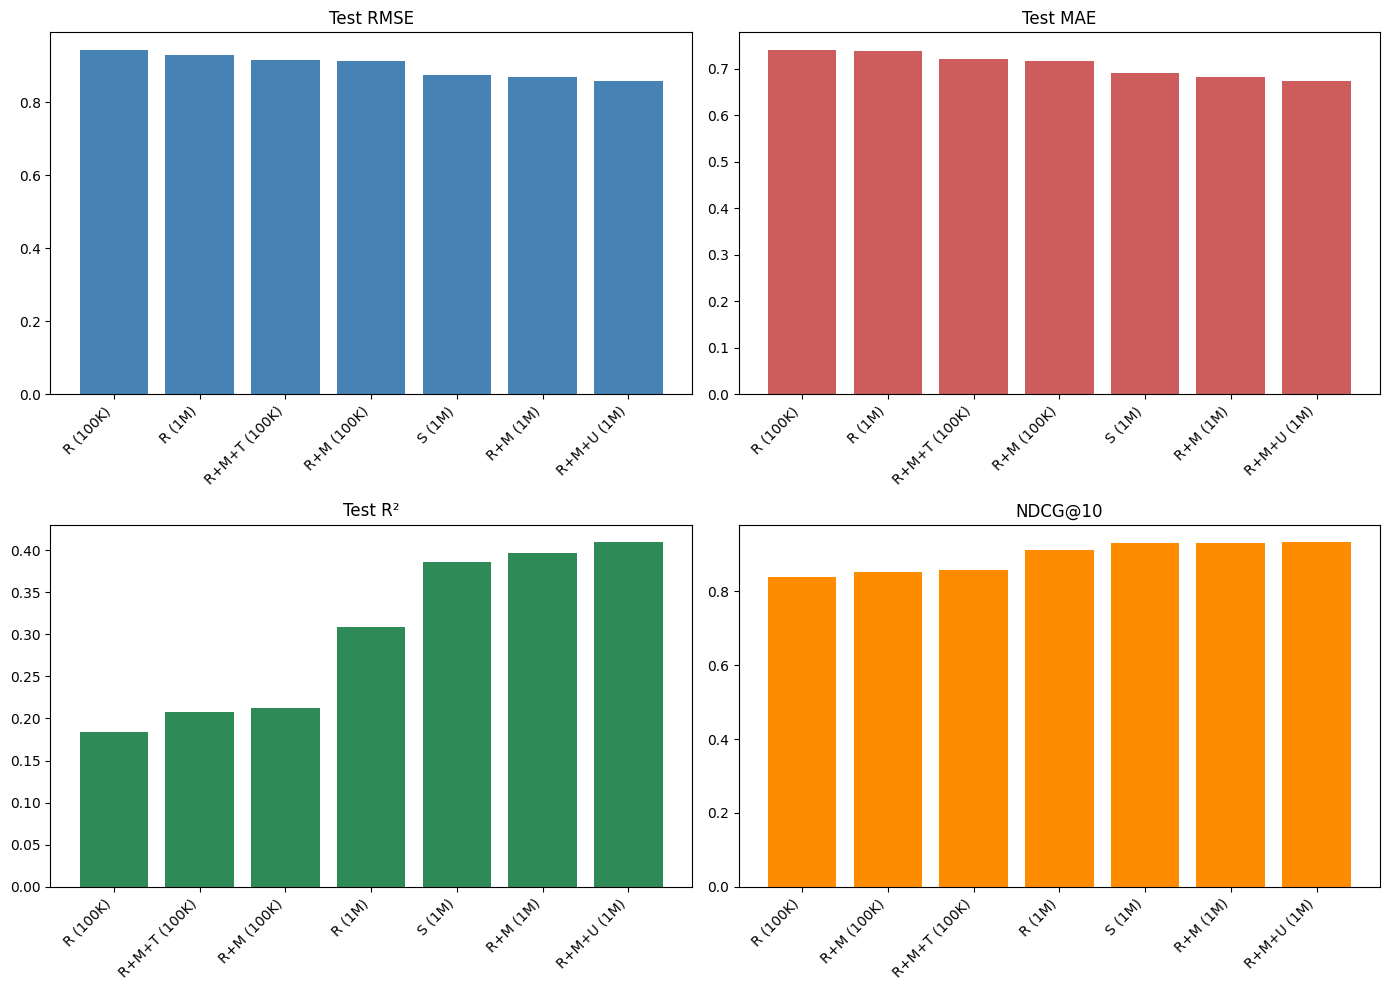

In [2]:
import matplotlib.pyplot as plt

# Ordenar los modelos por cada métrica (según si más es mejor o peor)
df_rmse = df.sort_values("Test RMSE", ascending=False)  # menor mejor
df_mae = df.sort_values("Test MAE", ascending=False)    # menor mejor
df_r2 = df.sort_values("Test R2", ascending=True)     # mayor mejor
df_ndcg = df.sort_values("NDCG@10", ascending=True)   # mayor mejor

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.ravel()

# RMSE
axs[0].bar(df_rmse["Modelo"], df_rmse["Test RMSE"], color='steelblue')
axs[0].set_title("Test RMSE")
axs[0].set_xticks(range(len(df_rmse)))
axs[0].set_xticklabels(df_rmse["Modelo"], rotation=45, ha="right")

# MAE
axs[1].bar(df_mae["Modelo"], df_mae["Test MAE"], color='indianred')
axs[1].set_title("Test MAE")
axs[1].set_xticks(range(len(df_mae)))
axs[1].set_xticklabels(df_mae["Modelo"], rotation=45, ha="right")

# R²
axs[2].bar(df_r2["Modelo"], df_r2["Test R2"], color='seagreen')
axs[2].set_title("Test R²")
axs[2].set_xticks(range(len(df_r2)))
axs[2].set_xticklabels(df_r2["Modelo"], rotation=45, ha="right")

# NDCG@10
axs[3].bar(df_ndcg["Modelo"], df_ndcg["NDCG@10"], color='darkorange')
axs[3].set_title("NDCG@10")
axs[3].set_xticks(range(len(df_ndcg)))
axs[3].set_xticklabels(df_ndcg["Modelo"], rotation=45, ha="right")

plt.tight_layout()
plt.show()

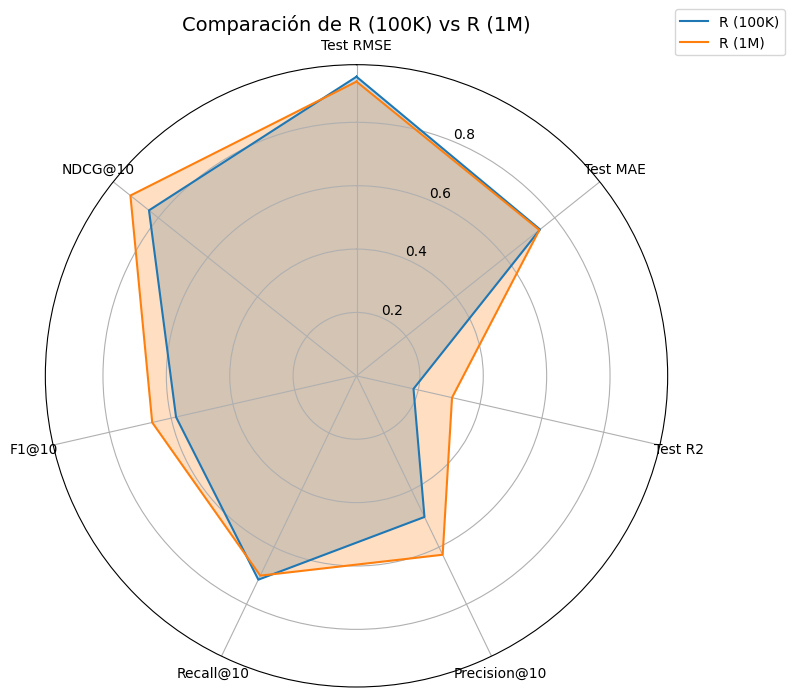

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Filtrar los modelos
modelos = ["R (100K)", "R (1M)"]
df_radar = df[df["Modelo"].isin(modelos)].set_index("Modelo")

# Métricas a comparar
metricas = ["Test RMSE", "Test MAE", "Test R2", "Precision@10", "Recall@10", "F1@10", "NDCG@10"]

# Normalizar las métricas si quieres que todo esté en la misma escala (opcional)
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df_radar[metricas] = scaler.fit_transform(df_radar[metricas])

# Coordenadas para el gráfico
labels = metricas
num_vars = len(labels)

# Convertir a ángulos para radar
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # cerrar el gráfico

# Crear figura
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plotear cada modelo
for modelo in modelos:
    valores = df_radar.loc[modelo, labels].tolist()
    valores += valores[:1]  # cerrar el gráfico
    ax.plot(angles, valores, label=modelo)
    ax.fill(angles, valores, alpha=0.25)

# Ajustes del gráfico
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title("Comparación de R (100K) vs R (1M)", fontsize=14)
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()

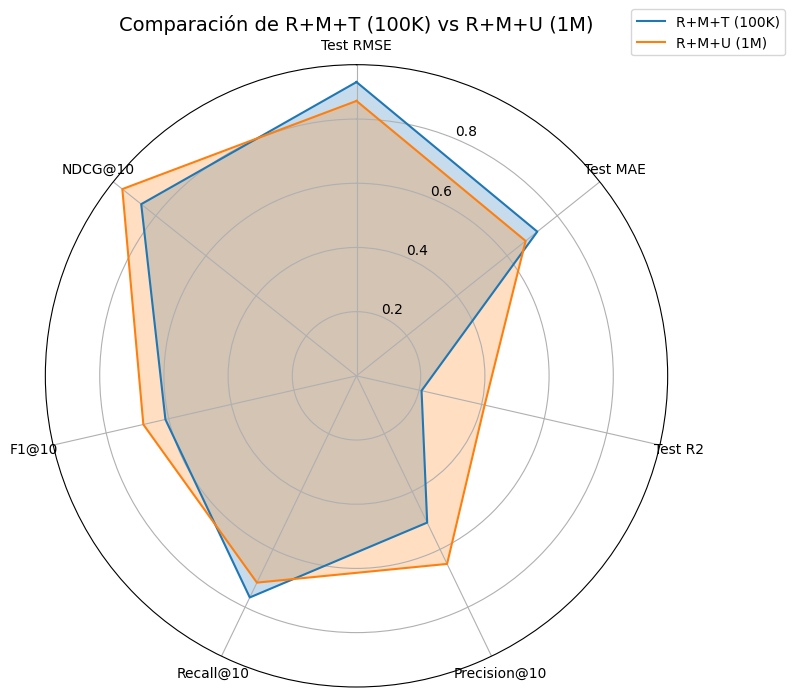

In [9]:
# Nuevos modelos a comparar
modelos = ["R+M+T (100K)", "R+M+U (1M)"]
df_radar = df[df["Modelo"].isin(modelos)].set_index("Modelo")

# Coordenadas para el gráfico
labels = metricas
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Crear figura
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plotear cada modelo
for modelo in modelos:
    valores = df_radar.loc[modelo, labels].tolist()
    valores += valores[:1]
    ax.plot(angles, valores, label=modelo)
    ax.fill(angles, valores, alpha=0.25)

# Ajustes del gráfico
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title("Comparación de R+M+T (100K) vs R+M+U (1M)", fontsize=14)
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()

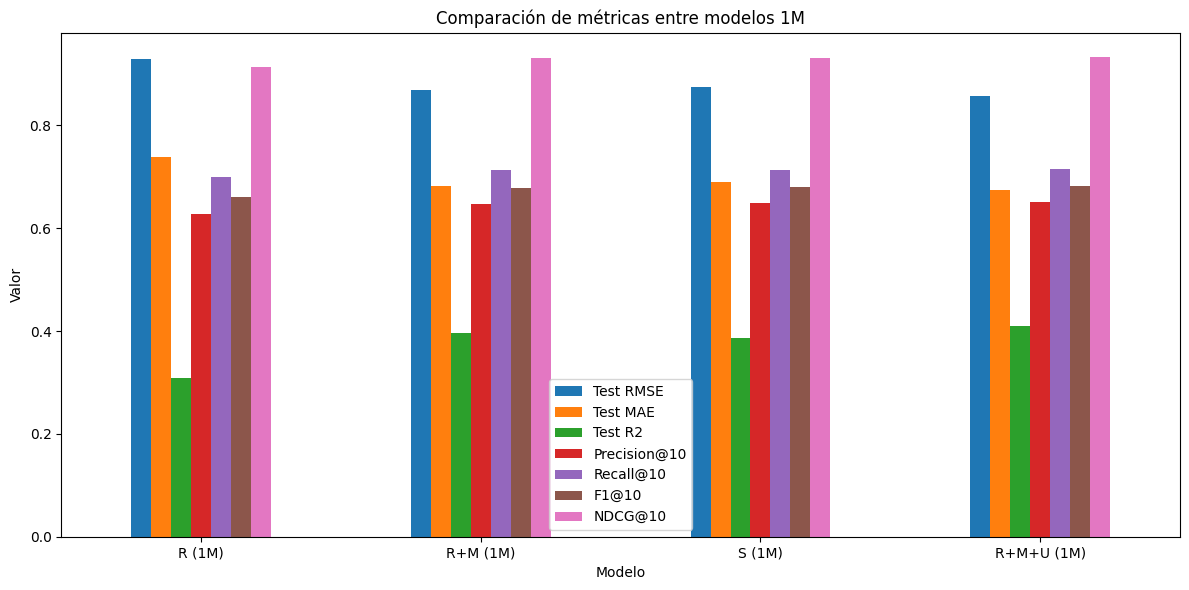

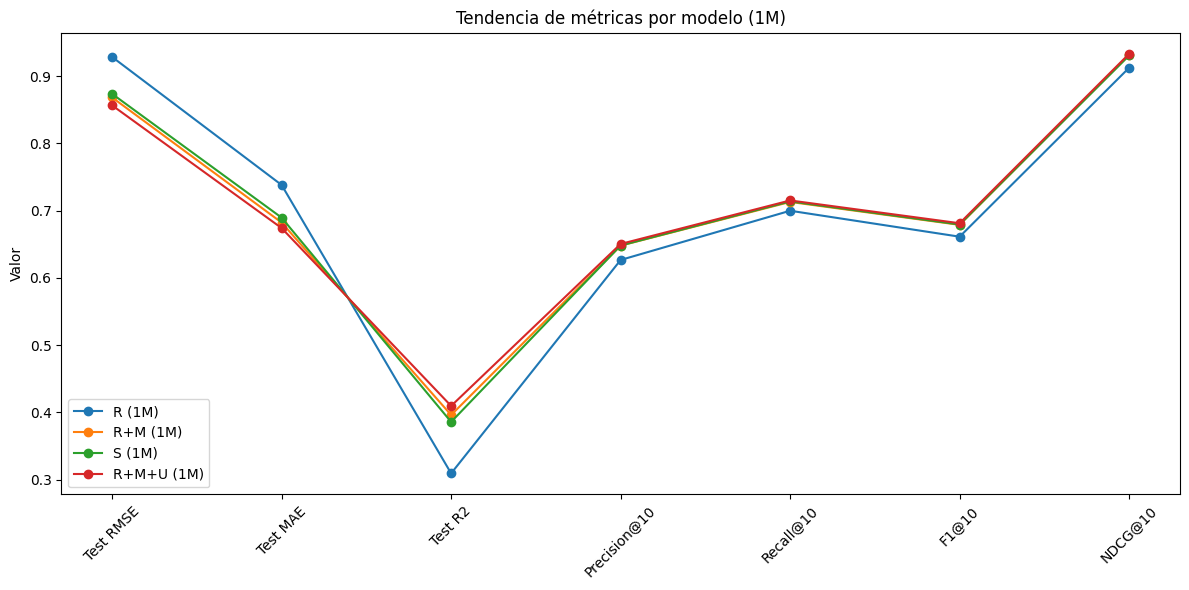

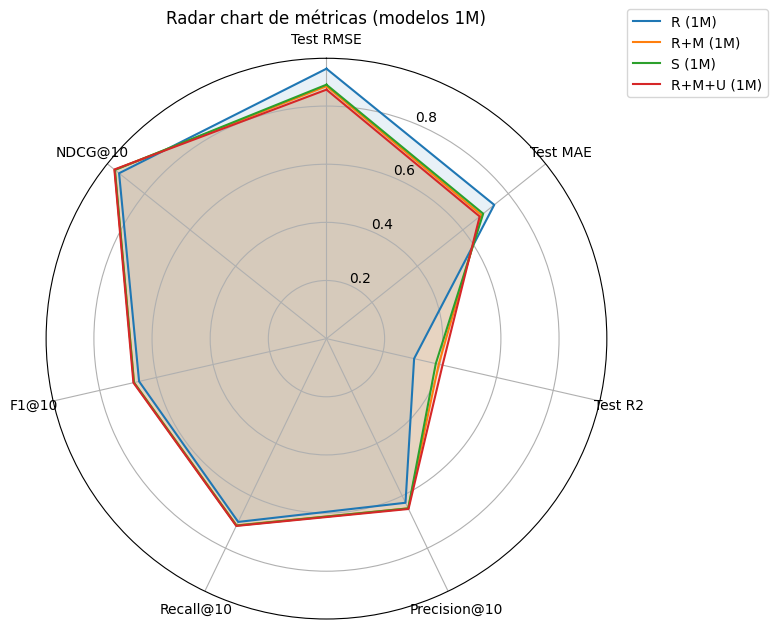

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Datos manuales (ya que no tengo tu CSV)
data = {
    "Modelo": ["R (1M)", "R+M (1M)", "S (1M)", "R+M+U (1M)"],
    "Test RMSE": [0.9285, 0.8683, 0.8736, 0.8565],
    "Test MAE": [0.7381, 0.6822, 0.6895, 0.674],
    "Test R2": [0.3092, 0.396, 0.3857, 0.4095],
    "Precision@10": [0.6266, 0.6479, 0.6481, 0.6504],
    "Recall@10": [0.6998, 0.7129, 0.7137, 0.7151],
    "F1@10": [0.6612, 0.6788, 0.6793, 0.6812],
    "NDCG@10": [0.9125, 0.9317, 0.9307, 0.9332],
}
df = pd.DataFrame(data).set_index("Modelo")
metricas = df.columns.tolist()

# 1. Barplot agrupado
df.plot(kind="bar", figsize=(12, 6))
plt.title("Comparación de métricas entre modelos 1M")
plt.ylabel("Valor")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. Lineplot por modelo
plt.figure(figsize=(12, 6))
for modelo in df.index:
    plt.plot(metricas, df.loc[modelo], label=modelo, marker='o')
plt.title("Tendencia de métricas por modelo (1M)")
plt.ylabel("Valor")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Radar chart con todos los modelos
angles = np.linspace(0, 2 * np.pi, len(metricas), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for modelo in df.index:
    valores = df.loc[modelo].tolist()
    valores += valores[:1]
    ax.plot(angles, valores, label=modelo)
    ax.fill(angles, valores, alpha=0.1)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), metricas)
ax.set_title("Radar chart de métricas (modelos 1M)")
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

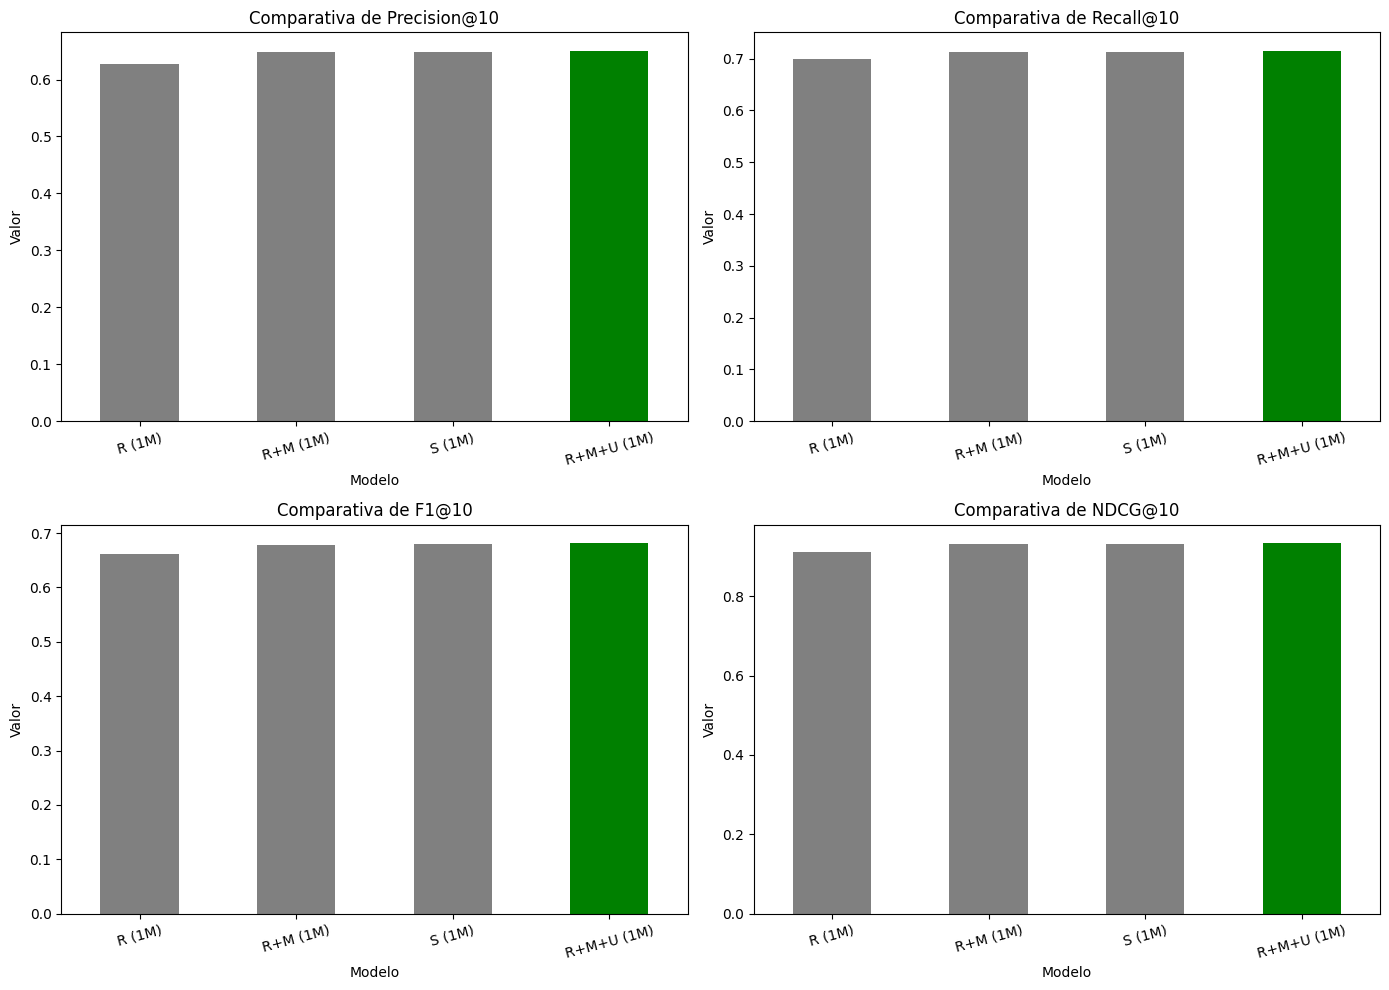

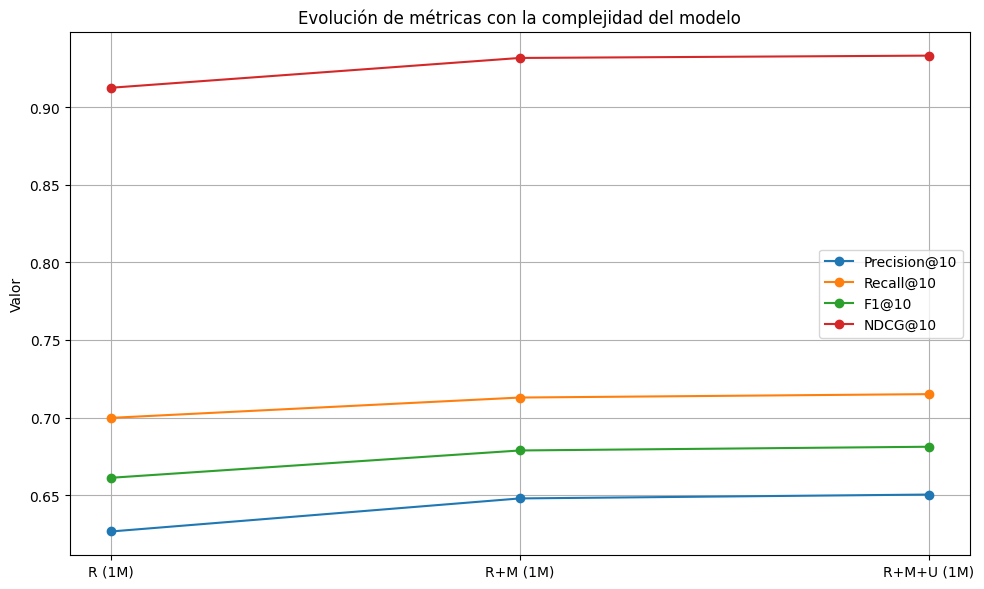

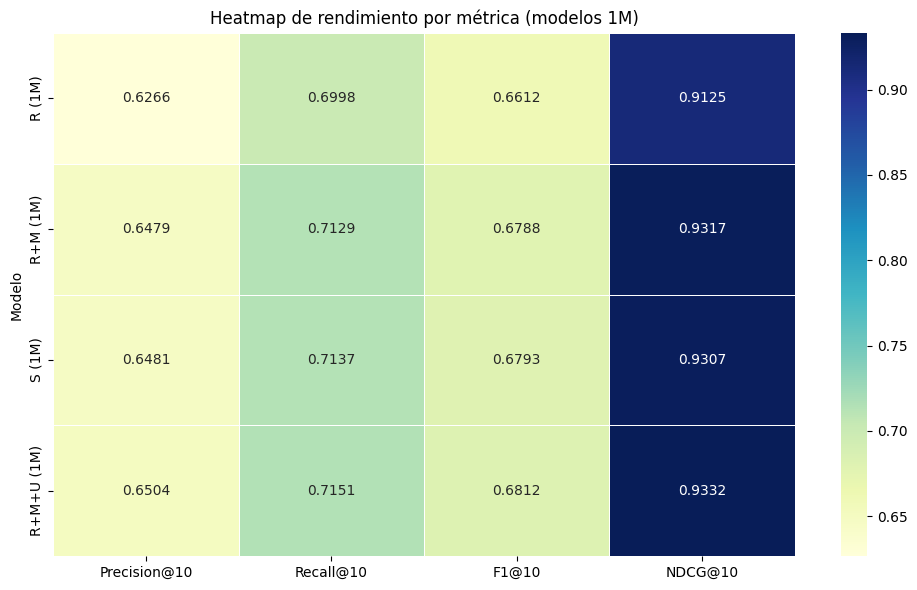

In [11]:
# 4. Subplots comparando R+M+U con los demás por métrica
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()
met_clave = ["Precision@10", "Recall@10", "F1@10", "NDCG@10"]

for i, metrica in enumerate(met_clave):
    df[metrica].plot(kind='bar', ax=axs[i], color=['gray' if m != "R+M+U (1M)" else 'green' for m in df.index])
    axs[i].set_title(f"Comparativa de {metrica}")
    axs[i].set_ylabel("Valor")
    axs[i].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

# 5. Línea de evolución con complejidad
modelos_orden = ["R (1M)", "R+M (1M)", "R+M+U (1M)"]
df_evol = df.loc[modelos_orden]
plt.figure(figsize=(10, 6))
for metrica in met_clave:
    plt.plot(modelos_orden, df_evol[metrica], marker='o', label=metrica)
plt.title("Evolución de métricas con la complejidad del modelo")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Heatmap de rendimiento por métrica
plt.figure(figsize=(10, 6))
sns.heatmap(df[met_clave], annot=True, cmap="YlGnBu", fmt=".4f", linewidths=.5)
plt.title("Heatmap de rendimiento por métrica (modelos 1M)")
plt.tight_layout()
plt.show()